# Goal: receive sensor data from the application PhonePi

### STARTING

See https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Notebook%20Basics.html

See https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks

See https://www.w3schools.com/python

The application PhonePi See: https://play.google.com/store/apps/details?id=com.phonepi

# HANDS ON  

* title
    * a
    * b
     * c

pip3 install flask
pip3 install flask_sockets
pip install paho-mqtt

RUN
python PhonePiPython3.py

$e^{i\pi} + 1 = 0$

# Zen of python

In [ ]:
import this

In [ ]:
import numpy             as np
import matplotlib.pyplot as plt
costs = [1.0,4.5,9.5,16.0]
#plt.ylabel('some numbers')
#plt.plot(costs)
plt.plot([1.0, 2, 3, 4.0], costs)
plt.show()

## Sender

In [ ]:
import time
import paho.mqtt.client as paho
broker="192.168.1.6"
client= paho.Client("mqttpythonsender") #create client object client1.on_publish = on_publish #assign function to callback client1.connect(broker,port) #establish connection client1.publish("house/bulb1","on")
print("connecting to broker ",broker)
client.connect(broker)                       #connect
time.sleep(1)
print("publishing ")
client.publish("unibo/livestream","2")         #publish
time.sleep(1)
print("publishing ")
client.publish("unibo/livestream","4")         #publish
time.sleep(1)
print("publishing ")
client.publish("unibo/livestream","9")         #publish
time.sleep(1)
client.disconnect()                        #disconnect
print("bye" )

## mqttReceiver.py

In [ ]:
import time
import paho.mqtt.client as paho
import matplotlib.pyplot as plt

brokerAddr="localhost"
duration = 20
data     = []
counter  = 0
firstVal = 0
rot      = 0

def on_message(client, userdata, message) :   #define callback
    global counter, rot, data, firstVal   
    if rot > 90  : 
        client.disconnect()             #disconnect
        return    
    msg      = str( message.payload.decode("utf-8")  )
    msgitems = msg.split(",")
    value    = msgitems[5]
    v       =  float( msgitems[5] )  
    #print( v )
    if counter <= 2 :
        firstVal  = v
        rot       = 0
        print("first",firstVal, "rot", rot, "count",counter)
    rot  = abs( v -  firstVal )
    print("rot:", rot, "count",counter )
    if rot < 90  :
        counter = counter + 1
        data.append( rot )  
        if rot > 85  :
        	print("WARNING ... rot=", rot )
    else :
        data.append( rot ) 
        print("first",firstVal, "rot", rot, "count",counter)
        plt.plot(data)
        plt.show()   
    
client= paho.Client("receiver")      
client.on_message=on_message            # Bind function to callback
client.connect(brokerAddr)              #connect
print("connected to broker ", brokerAddr)
print("subscribing to unibo/qak/events")
client.subscribe("unibo/qak/events")      #subscribe
client.loop_start()             #start loop to process received messages
time.sleep(duration)
client.disconnect()             #disconnect
print("bye")
client.loop_stop()              #stop loop 

   

## mqttPlotQakEvents.py

connected to broker  localhost
subscribing to unibo/qak/events
collecting values; please wait ...
evMsg= msg(g521,event,rasp,none,g521(gyro,-2.02290076336,1.50381679389,0.0458015267176),1) msgnum= 0
evMsg= msg(g521,event,rasp,none,g521(gyro,-1.71755725191,1.19083969466,0.0916030534351),2) msgnum= 1
evMsg= msg(g521,event,rasp,none,g521(gyro,-1.87022900763,1.18320610687,0.0534351145038),3) msgnum= 2
evMsg= msg(g521,event,rasp,none,g521(gyro,-3.86259541985,1.59541984733,0.0763358778626),4) msgnum= 3
evMsg= msg(g521,event,rasp,none,g521(gyro,-1.65648854962,1.25954198473,0.0534351145038),5) msgnum= 4
evMsg= msg(g521,event,rasp,none,g521(gyro,-1.71755725191,1.49618320611,0.114503816794),6) msgnum= 5
evMsg= msg(g521,event,rasp,none,g521(gyro,-1.80152671756,1.3358778626,0.221374045802),7) msgnum= 6
evMsg= msg(g521,event,rasp,none,g521(gyro,-1.83969465649,1.38167938931,0.152671755725),8) msgnum= 7
evMsg= msg(g521,event,rasp,none,g521(gyro,-3.87786259542,1.32824427481,0.137404580153),9) msgnum= 

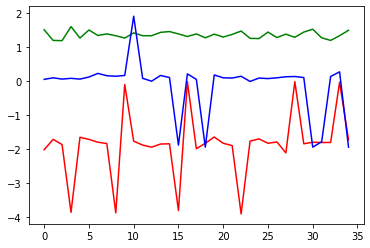

bye


In [16]:
import time
import paho.mqtt.client as paho
import matplotlib.pyplot as plt

brokerAddr="localhost"
duration = 20
x        = []
y        = []
z        = []
goon     = True
msgnum   = 0 
def on_message(client, userdata, message) :   #define callback
	global msgnum,  x,y,z, goon
	if not goon :
		return
	#msg(androidSensor,event,android,none,androidSensor(TYPE,X,Y,Z),MSGNUM)
    #msg(g521,event, gyroSender, none, g521(TYPE,X,Y,Z),MSGNUM)
	evMsg = str( message.payload.decode("utf-8")  )
	msgitems = evMsg.split(",")
	if msgnum < 35  :
		print("evMsg=", evMsg, "msgnum=", msgnum )
		msgnum = msgnum + 1
		x.append( float( msgitems[5] ) )
		y.append( float( msgitems[6] ) )
		vz = float( msgitems[7].split(')')[0] )
		z.append( vz )
	else  :
		print("evMsg=", evMsg, "msgnum=", msgnum )
		plt.plot(list(x), color='red')
		plt.plot(list(y), color='green')
		plt.plot(list(z), color='blue')
		plt.show()
		goon = False
		client.disconnect()
    
client= paho.Client("receiver")      
client.on_message=on_message            # Bind function to callback

client.connect(brokerAddr)              #connect
print("connected to broker ", brokerAddr)
print("subscribing to unibo/qak/events")
client.subscribe("unibo/qak/events")      #subscribe

print("collecting values; please wait ..." )
client.loop_start()             #start loop to process received messages
time.sleep(duration)
client.disconnect()             #disconnect
print("bye")
client.loop_stop()              #stop loop        


### gyro.py

In [ ]:
import time
import paho.mqtt.client as paho
import matplotlib.pyplot as plt

brokerAddr="localhost"
duration  = 15
x         = []
y         = []
z         = []
r         = []
counter   = 0 
goon      = True
dt        = 0
startTime = 0
angle     = 0.0

def on_message(client, userdata, message) :   #define callback
	global counter,  goon, x, y, z, r, startTime, angle
	now     = time.time() 
	elapsed = now-startTime
	#print( "now=" , now, "elapsed=",  elapsed)
	startTime = now
	counter = counter + 1
	#msg(androidSensor,event,android,none,androidSensor(TYPE,X,Y,Z),MSGNUM)
	evMsg = str( message.payload.decode("utf-8")  )
	#print("evMsg=", evMsg )
	msgitems = evMsg.split(",")
	x.append( float( msgitems[5] ) )
	y.append( float( msgitems[6] ) )
	vz = float( msgitems[7].split(')')[0] )
	z.append( vz )
	
	da    = abs(vz) * elapsed
	angle = angle + da
	r.append( angle )
	print("vz=", ("%.3f" % vz), "angle=", ("%.3f" % angle), "counter=", counter)
	#print("elapsed=", ("%.2f" % elapsed), "da=", ("%.2f" % da) ) 	
	if angle > 90.0 and goon :
		plt.plot(x, color='red')
		plt.plot(y, color='green')
		plt.plot(z, color='blue')
		plt.plot(r, color='black')
		plt.show()
		goon = False
		client.disconnect()
     
plt.style.use("classic")
client= paho.Client("receiver")      
client.on_message=on_message            # Bind function to callback
client.connect(brokerAddr)              #connect
print("connected to broker ", brokerAddr)
print("subscribing to unibo/qak/events")
client.subscribe("unibo/qak/events")      #subscribe
startTime     = time.time() 
#print( "startTime=" , ti
print( "startTime=" , startTime )
client.loop_start()             #start loop to process received messages
time.sleep(duration)
client.disconnect()             #disconnect
print("bye")
client.loop_stop()              #stop loop        
     
